In [1]:
import pandas as pd
import numpy as np
import os
from scipy.spatial.transform import Rotation as R
import torch
import time
import matplotlib.pyplot as plt

In [2]:
#计算欧拉角
def quaternion2euler(quaternion):
    r = R.from_quat(quaternion)
    euler = r.as_euler('xyz', degrees=True)
    return euler

In [3]:
train_fall_batch = []
num_sample = 40
array=[1,2,3,4,5,6]
for i in range(1,16):
    for j in range(6):
        k = array[j]
        s1 = r'C:\Users\Desktop\20230511_code\HR_IMU_falldetection_dataset-master\HR_IMU_falldetection_dataset-master\subject_'
        s2 = str(i).zfill(2)
        s3 = r'\fall\fall'
        s4 = str(k)
        s5 = r'.xls'
        ss = s1+s2+s3+s4+s5
        if os.path.exists(ss):
            df = pd.read_excel(ss)
            data = df[['w','x','y','z']]
            #print(data)
            data_len = len(data)
            #print(data_len)
            #print(data_len/(num_sample))
            distance = int(data_len/num_sample)
            #print(distance)
            new_data = []
            a = 0
            while len(new_data)<num_sample and a*distance<=(data_len-1):
                quaternion = data.loc[a*distance].tolist()
                #print(quaternion)
                Euler = quaternion2euler(quaternion).tolist()
                #print(Euler)
                new_data.append(Euler)
                a+=1
            train_fall_batch.append(new_data)
train_fall_batch = torch.tensor(train_fall_batch,dtype=torch.float32)

In [4]:
train_nofall_batch = []
num_sample = 40
array=["bed","chair","clap","cloth","eat","hair","shoe","stair","teeth","walk","wash","write","zip"]
for i in range(1,16):
    for j in range(6):
        k = array[j]
        s1 = r'C:\Users\Desktop\20230511_code\HR_IMU_falldetection_dataset-master\HR_IMU_falldetection_dataset-master\subject_'
        s2 = str(i).zfill(2)
        s3 = r'\non-fall' '\\'
        s4 = k
        s5 = r'.xls'
        ss = s1+s2+s3+s4+s5
        #print(ss)
        if os.path.exists(ss):
            df = pd.read_excel(ss)
            data = df[['w','x','y','z']]
            #print(data)
            data_len = len(data)
            #print(data_len)
            #print(data_len/(num_sample))
            distance = int(data_len/num_sample)
            #print(distance)
            new_data = []
            a = 0
            while len(new_data)<num_sample and a*distance<=(data_len-1):
                quaternion = data.loc[a*distance].tolist()
                #print(quaternion)
                Euler = quaternion2euler(quaternion).tolist()
                #print(Euler)
                new_data.append(Euler)
                a+=1
            train_nofall_batch.append(new_data)
train_nofall_batch = torch.tensor(train_nofall_batch,dtype=torch.float32)

In [5]:
y_train_fall_batch = torch.ones(train_fall_batch.shape[0])
y_train_nofall_batch = torch.zeros(train_nofall_batch.shape[0])
train_data = torch.cat((train_fall_batch,train_nofall_batch)).long()
y_train_data = torch.cat((y_train_fall_batch,y_train_nofall_batch))#.unsqueeze(1)
print(y_train_data.shape,train_data.shape)

torch.Size([153]) torch.Size([153, 40, 3])


In [6]:
nor_max = torch.max(train_data.view(-1, 3),0).values
nor_min = torch.min(train_data.view(-1, 3),0).values

In [7]:
#nor_min

In [8]:
train_data = torch.div((train_data-nor_min.repeat(153,40,1)),nor_max.repeat(153,40,1) - nor_min.repeat(153,40,1))

In [9]:
val_fall_batch = []
num_sample = 40
array=[1,2,3,4,5,6]
for i in range(16,19):
    for j in range(6):
        k = array[j]
        s1 = r'C:\Users\Desktop\20230511_code\HR_IMU_falldetection_dataset-master\HR_IMU_falldetection_dataset-master\subject_'
        s2 = str(i).zfill(2)
        s3 = r'\fall\fall'
        s4 = str(k)
        s5 = r'.xls'
        ss = s1+s2+s3+s4+s5
        if os.path.exists(ss):
            df = pd.read_excel(ss)
            data = df[['w','x','y','z']]
            #print(data)
            data_len = len(data)
            #print(data_len)
            #print(data_len/(num_sample))
            distance = int(data_len/num_sample)
            #print(distance)
            new_data = []
            a = 0
            while len(new_data)<num_sample and a*distance<=(data_len-1):
                quaternion = data.loc[a*distance].tolist()
                #print(quaternion)
                Euler = quaternion2euler(quaternion).tolist()
                #print(Euler)
                new_data.append(Euler)
                a+=1
            val_fall_batch.append(new_data)
val_fall_batch = torch.tensor(val_fall_batch,dtype=torch.float32)

In [10]:
val_nofall_batch = []
num_sample = 40
array=["bed","chair","clap","cloth","eat","hair","shoe","stair","teeth","walk","wash","write","zip"]
for i in range(16,19):
    for j in range(6):
        k = array[j]
        s1 = r'C:\Users\Desktop\20230511_code\HR_IMU_falldetection_dataset-master\HR_IMU_falldetection_dataset-master\subject_'
        s2 = str(i).zfill(2)
        s3 = r'\non-fall' '\\'
        s4 = k
        s5 = r'.xls'
        ss = s1+s2+s3+s4+s5
        #print(ss)
        if os.path.exists(ss):
            df = pd.read_excel(ss)
            data = df[['w','x','y','z']]
            #print(data)
            data_len = len(data)
            #print(data_len)
            #print(data_len/(num_sample))
            distance = int(data_len/num_sample)
            #print(distance)
            new_data = []
            a = 0
            while len(new_data)<num_sample and a*distance<=(data_len-1):
                quaternion = data.loc[a*distance].tolist()
                #print(quaternion)
                Euler = quaternion2euler(quaternion).tolist()
                #print(Euler)
                new_data.append(Euler)
                a+=1
            val_nofall_batch.append(new_data)
val_nofall_batch = torch.tensor(val_nofall_batch,dtype=torch.float32)

In [11]:
y_val_fall_batch = torch.ones(val_fall_batch.shape[0])
y_val_nofall_batch = torch.zeros(val_nofall_batch.shape[0])
val_data = torch.cat((val_fall_batch,val_nofall_batch)).long()
y_val_data = torch.cat((y_val_fall_batch,y_val_nofall_batch))#.unsqueeze(1)
print(y_val_data.shape,val_data.shape)

torch.Size([31]) torch.Size([31, 40, 3])


In [12]:
y_val_data

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
val_data = torch.div((val_data-nor_min.repeat(31,40,1)),nor_max.repeat(31,40,1) - nor_min.repeat(31,40,1))

In [14]:
test_fall_batch = []
num_sample = 40
array=[1,2,3,4,5,6]
for i in range(19,22):
    for j in range(6):
        k = array[j]
        s1 = r'C:\Users\Desktop\20230511_code\HR_IMU_falldetection_dataset-master\HR_IMU_falldetection_dataset-master\subject_'
        s2 = str(i).zfill(2)
        s3 = r'\fall\fall'
        s4 = str(k)
        s5 = r'.xls'
        ss = s1+s2+s3+s4+s5
        if os.path.exists(ss):
            df = pd.read_excel(ss)
            data = df[['w','x','y','z']]
            #print(data)
            data_len = len(data)
            #print(data_len)
            #print(data_len/(num_sample))
            distance = int(data_len/num_sample)
            #print(distance)
            new_data = []
            a = 0
            while len(new_data)<num_sample and a*distance<=(data_len-1):
                quaternion = data.loc[a*distance].tolist()
                #print(quaternion)
                Euler = quaternion2euler(quaternion).tolist()
                #print(Euler)
                new_data.append(Euler)
                a+=1
            test_fall_batch.append(new_data)
test_fall_batch = torch.tensor(test_fall_batch,dtype=torch.float32)

In [15]:
test_nofall_batch = []
num_sample = 40
array=["bed","chair","clap","cloth","eat","hair","shoe","stair","teeth","walk","wash","write","zip"]
for i in range(19,22):
    for j in range(6):
        k = array[j]
        s1 = r'C:\Users\Desktop\20230511_code\HR_IMU_falldetection_dataset-master\HR_IMU_falldetection_dataset-master\subject_'
        s2 = str(i).zfill(2)
        s3 = r'\non-fall' '\\'
        s4 = k
        s5 = r'.xls'
        ss = s1+s2+s3+s4+s5
        #print(ss)
        if os.path.exists(ss):
            df = pd.read_excel(ss)
            data = df[['w','x','y','z']]
            #print(data)
            data_len = len(data)
            #print(data_len)
            #print(data_len/(num_sample))
            distance = int(data_len/num_sample)
            #print(distance)
            new_data = []
            a = 0
            while len(new_data)<num_sample and a*distance<=(data_len-1):
                quaternion = data.loc[a*distance].tolist()
                #print(quaternion)
                Euler = quaternion2euler(quaternion).tolist()
                #print(Euler)
                new_data.append(Euler)
                a+=1
            test_nofall_batch.append(new_data)
test_nofall_batch = torch.tensor(test_nofall_batch,dtype=torch.float32)

In [16]:
y_test_fall_batch = torch.ones(test_fall_batch.shape[0])
y_test_nofall_batch = torch.zeros(test_nofall_batch.shape[0])
test_data = torch.cat((test_fall_batch,test_nofall_batch)).long()
y_test_data = torch.cat((y_test_fall_batch,y_test_nofall_batch))#.unsqueeze(1)
print(y_test_data.shape,test_data.shape)

torch.Size([30]) torch.Size([30, 40, 3])


In [17]:
test_data = torch.div((test_data-nor_min.repeat(30,40,1)),nor_max.repeat(30,40,1) - nor_min.repeat(30,40,1))

In [54]:
class MV_LSTM(torch.nn.Module):
    def __init__(self,n_features,seq_length):
        super(MV_LSTM, self).__init__()
        self.n_features = n_features
        self.seq_len = seq_length
        self.n_hidden = 20 
        self.n_layers = 1 

        self.l_lstm = torch.nn.LSTM(input_size = n_features, 
                                 hidden_size = self.n_hidden,
                                 num_layers = self.n_layers, 
                                 batch_first = True
                                )
        self.l_linear = torch.nn.Linear(self.n_hidden, 2)

    '''
    def init_hidden(self, batch_size):
        hidden_state = torch.zeros(self.n_layers,batch_size,self.n_hidden)
        cell_state = torch.zeros(self.n_layers,batch_size,self.n_hidden)
        self.hidden = (hidden_state, cell_state)
    '''

    def forward(self, x):
        #BN = torch.nn.BatchNorm2d(40,3)
        batch_size, seq_len, _= x.size()

        lstm_out, hidden = self.l_lstm(x)
        x = lstm_out[:,self.seq_len-1,:]
        return self.l_linear(x)

In [55]:
mv_net=MV_LSTM(3,num_sample)
mv_net

MV_LSTM(
  (l_lstm): LSTM(3, 20, batch_first=True)
  (l_linear): Linear(in_features=20, out_features=2, bias=True)
)

In [56]:
loss_func=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(mv_net.parameters(), lr=0.001)

In [57]:
def train(net,criterion,x,y):
    net.train()
    #train_batch_num=len(data_loader)
    #total_loss=0
    correct=0
    sample_num=0
    #for batch_idx,(data,target) in enumerate(data_loader):
    optimizer.zero_grad()
    output=net(x)
    loss=criterion(output,y)
    loss.backward()
    optimizer.step()
    #total_loss+=loss.item()
    prediction=torch.argmax(output,1)
    correct+=(prediction==y).sum().item()
    sample_num+=len(prediction)
    acc=correct/sample_num
    return loss,acc

In [58]:
def test(net,criterion,x,y):
    net.eval()
    #test_batch_num=len(data_loader)
    #total_loss=0
    correct=0
    sample_num=0
    #for batch_idx,(data,target) in enumerate(data_loader):
    output=net(x)
    loss=criterion(output,y)
    #total_loss+=loss.item()
    prediction=torch.argmax(output,1)
    correct+=(prediction==y).sum().item()
    sample_num+=len(prediction)
    acc=correct/sample_num
    return loss,acc

In [59]:
epoch=150
train_loss_list=[]
train_acc_list=[]
val_loss_list=[]
val_acc_list=[]
test_loss_list=[]
test_acc_list=[]
since=time.time()
for epoch in range(epoch):
    train_loss,train_acc=train(mv_net,loss_func,train_data,y_train_data.long())
    val_loss,val_acc=test(mv_net,loss_func,val_data,y_val_data.long())
    test_loss,test_acc=test(mv_net,loss_func,test_data,y_test_data.long())
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    print(f"epoch: {epoch} \t train_loss: {train_loss:.4f}\t"
          f" train_acc: {train_acc}\t"
          f" val_loss: {val_loss:.4f}\t val_acc:{val_acc}"
          f" test_loss: {test_loss:.4f}\t test_acc:{test_acc}")
time_elapsed=(time.time()-since)/60

epoch: 0 	 train_loss: 0.7055	 train_acc: 0.477124183006536	 val_loss: 0.7008	 val_acc:0.5161290322580645 test_loss: 0.7014	 test_acc:0.5
epoch: 1 	 train_loss: 0.7041	 train_acc: 0.477124183006536	 val_loss: 0.7004	 val_acc:0.5161290322580645 test_loss: 0.7005	 test_acc:0.5
epoch: 2 	 train_loss: 0.7028	 train_acc: 0.477124183006536	 val_loss: 0.7001	 val_acc:0.5161290322580645 test_loss: 0.6996	 test_acc:0.5
epoch: 3 	 train_loss: 0.7015	 train_acc: 0.477124183006536	 val_loss: 0.6999	 val_acc:0.5161290322580645 test_loss: 0.6988	 test_acc:0.5
epoch: 4 	 train_loss: 0.7002	 train_acc: 0.477124183006536	 val_loss: 0.6997	 val_acc:0.5161290322580645 test_loss: 0.6981	 test_acc:0.5
epoch: 5 	 train_loss: 0.6990	 train_acc: 0.477124183006536	 val_loss: 0.6995	 val_acc:0.5161290322580645 test_loss: 0.6974	 test_acc:0.5
epoch: 6 	 train_loss: 0.6979	 train_acc: 0.477124183006536	 val_loss: 0.6994	 val_acc:0.5161290322580645 test_loss: 0.6967	 test_acc:0.5
epoch: 7 	 train_loss: 0.6968	 tra

epoch: 56 	 train_loss: 0.6553	 train_acc: 0.6601307189542484	 val_loss: 0.8025	 val_acc:0.41935483870967744 test_loss: 0.7006	 test_acc:0.5666666666666667
epoch: 57 	 train_loss: 0.6528	 train_acc: 0.6535947712418301	 val_loss: 0.8118	 val_acc:0.41935483870967744 test_loss: 0.7007	 test_acc:0.5666666666666667
epoch: 58 	 train_loss: 0.6502	 train_acc: 0.6666666666666666	 val_loss: 0.8208	 val_acc:0.41935483870967744 test_loss: 0.6996	 test_acc:0.5666666666666667
epoch: 59 	 train_loss: 0.6476	 train_acc: 0.673202614379085	 val_loss: 0.8284	 val_acc:0.3548387096774194 test_loss: 0.6968	 test_acc:0.5666666666666667
epoch: 60 	 train_loss: 0.6448	 train_acc: 0.6601307189542484	 val_loss: 0.8338	 val_acc:0.3548387096774194 test_loss: 0.6920	 test_acc:0.5666666666666667
epoch: 61 	 train_loss: 0.6418	 train_acc: 0.6601307189542484	 val_loss: 0.8364	 val_acc:0.3548387096774194 test_loss: 0.6856	 test_acc:0.5666666666666667
epoch: 62 	 train_loss: 0.6388	 train_acc: 0.6535947712418301	 val_l

epoch: 110 	 train_loss: 0.5976	 train_acc: 0.6928104575163399	 val_loss: 0.7082	 val_acc:0.5806451612903226 test_loss: 0.5708	 test_acc:0.7333333333333333
epoch: 111 	 train_loss: 0.5860	 train_acc: 0.7189542483660131	 val_loss: 0.7064	 val_acc:0.5806451612903226 test_loss: 0.5986	 test_acc:0.7
epoch: 112 	 train_loss: 0.5951	 train_acc: 0.7124183006535948	 val_loss: 0.7360	 val_acc:0.5806451612903226 test_loss: 0.5993	 test_acc:0.7
epoch: 113 	 train_loss: 0.6071	 train_acc: 0.6993464052287581	 val_loss: 0.7000	 val_acc:0.6129032258064516 test_loss: 0.6007	 test_acc:0.6666666666666666
epoch: 114 	 train_loss: 0.5919	 train_acc: 0.7124183006535948	 val_loss: 0.7059	 val_acc:0.6129032258064516 test_loss: 0.5717	 test_acc:0.7333333333333333
epoch: 115 	 train_loss: 0.5861	 train_acc: 0.7124183006535948	 val_loss: 0.7097	 val_acc:0.6129032258064516 test_loss: 0.5780	 test_acc:0.7
epoch: 116 	 train_loss: 0.5921	 train_acc: 0.7058823529411765	 val_loss: 0.7085	 val_acc:0.6129032258064516 

In [60]:
time_elapsed

0.10514880418777466

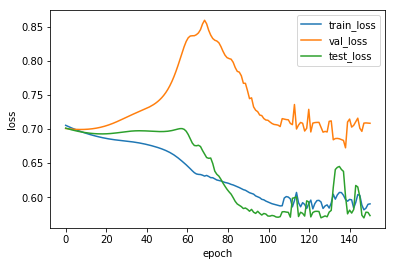

In [61]:
x=np.linspace(0,len(train_loss_list),len(test_loss_list))
plt.plot(x,train_loss_list,label="train_loss",linewidth=1.5)
plt.plot(x,val_loss_list,label="val_loss",linewidth=1.5)
plt.plot(x,test_loss_list,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

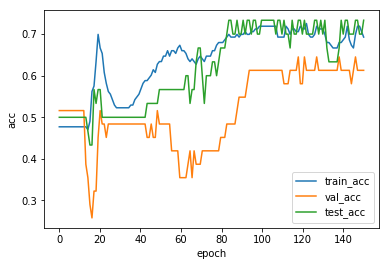

In [62]:
x=np.linspace(0,len(train_acc_list),len(test_acc_list))
plt.plot(x,train_acc_list,label="train_acc",linewidth=1.5)
plt.plot(x,val_acc_list,label="val_acc",linewidth=1.5)
plt.plot(x,test_acc_list,label="test_acc",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()